In [1]:
import numpy as np
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
# tf.keras.preprocessing.image_dataset_from_directory를 통해 directory에서 데이터 가져오기
test_dir = 'mnist_num/test'

def load_data(path):
    data = tf.keras.preprocessing.image_dataset_from_directory(
        path, label_mode='categorical', color_mode='grayscale',
        image_size=(150,150), batch_size=98
    )

    for i, j in data.take(1):
        X = i
        y = j
        
    data_X = np.squeeze(np.array(X)) / 255
    data_y = np.array(y)

    data_X = data_X.reshape((-1, 150, 150, 1))

    return data_X, data_y

X, y = load_data(test_dir)
X.shape, y.shape

Found 98 files belonging to 10 classes.


((98, 150, 150, 1), (98, 10))

In [3]:
from tensorflow.keras.models import load_model
model = load_model('my_model6.h5')

In [4]:
predict_y = model.predict(X)

In [5]:
for i in range(10):
    print('True :', str(np.argmax(y[i])) , 'Predict :', str(np.argmax(predict_y[i])))

True : 1 Predict : 1
True : 8 Predict : 5
True : 6 Predict : 6
True : 8 Predict : 8
True : 3 Predict : 3
True : 4 Predict : 4
True : 9 Predict : 9
True : 1 Predict : 1
True : 4 Predict : 4
True : 1 Predict : 1


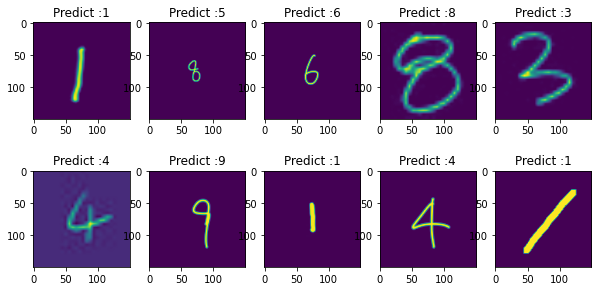

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))

for i in range(10):
    ax = fig.add_subplot(2,5,i+1)
    plt.imshow(X[i])
    # plt.xticks([]), plt.yticks([])
    plt.title("Predict :" + str(np.argmax(predict_y[i])))

In [7]:
pred = []
label = []
for i in predict_y:
    pred.append(np.argmax(i))

for i in y:
    label.append(np.argmax(i))

In [8]:
pred = np.array(pred)
label = np.array(label)

In [9]:
correct = (pred == label).sum()

In [10]:
print('acc : ' , correct/98)

acc :  0.9387755102040817


In [11]:
model.evaluate(X, y)

4/4 [==============================] - 0s 10ms/step - loss: 0.6764 - accuracy: 0.9388


[0.676445722579956, 0.9387755393981934]

In [14]:
a = X[pred != label]
b = pred[pred != label]
a.shape, b.shape

((6, 150, 150, 1), (6,))

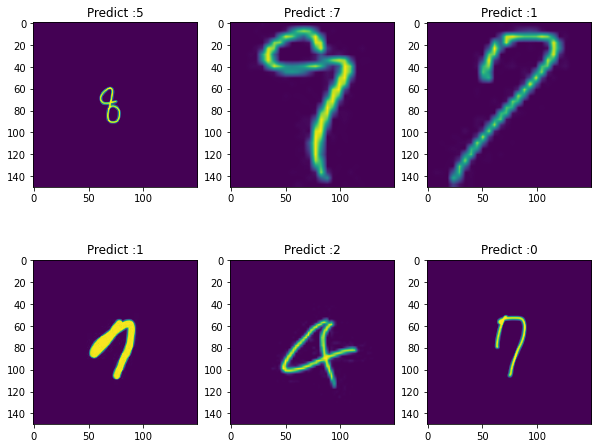

In [21]:
fig = plt.figure(figsize=(10, 8))
for i in range(6):
    ax = fig.add_subplot(2, 3, i + 1)
    plt.imshow(a[i])
    plt.title("Predict :"+ str(b[i]))